# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/data_analytics/GK/Week_04


## 1.) Get data for the stock TSLA (Tesla) from Yahoo Finance

In [2]:
# Retrieve the TESLA stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

df = yf.download('TSLA', start = "2022-01-01", end = today, progress=False)
df

Today is: 2023-10-10


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200


## 2.) Apply non-graphical Exploratory Data Analysis (EDA) methods

### a) What are the values for min, max. mean and median of the close price?

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,444.000000,444.000000,444.000000,444.000000,444.000000,4.440000e+02
mean,241.231607,246.892110,235.067830,240.928679,240.928679,1.110572e+08
std,58.977818,60.055467,57.361312,58.483914,58.483914,4.320942e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,193.797504,197.627499,189.440002,194.285000,194.285000,7.928550e+07
50%,244.418335,250.791664,239.251663,244.259995,244.259995,1.016746e+08
75%,282.880821,288.527512,275.507492,282.595009,282.595009,1.354173e+08
max,396.516663,402.666656,378.679993,399.926666,399.926666,3.065906e+08


### b) What is the 10% Quantile and 90% quantile of close price?

In [4]:
df.quantile(q=[0.10, 0.90]).round(2)

,Open,High,Low,Close,Adj Close,Volume
0.1,167.52,171.72,164.04,167.84,167.84,62595630.0
0.9,310.70,315.04,301.80,309.25,309.25,170490420.0


## 3.) Apply graphical Exploratory Data Analysis (EDA) methods

### a) Plot a line chart of the close price

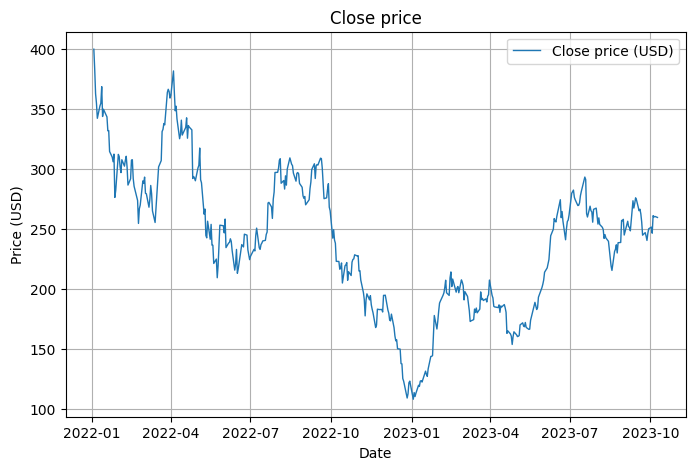

In [5]:
# Create the plot
plt.figure(figsize=(8, 5))

# Set the title and axis labels
plt.title('Close price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(df.Close, lw=1.0, label='Close price (USD)')

# Add a legend to the axis
plt.legend()

# Add grid
plt.grid()

plt.show()

### b) Plot a histogram of the close price

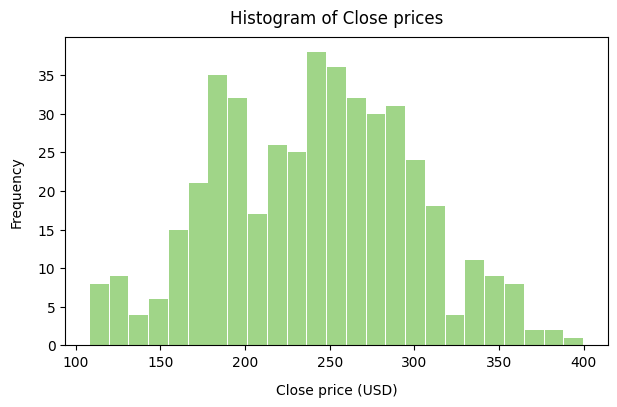

In [12]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

n, bins, patches = plt.hist(x=df['Close'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )

# Plot settings
plt.xlabel('Close price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Close prices', fontsize=12, pad=10)

# Show plot
plt.show()

### c) Plot a boxplot of the close price

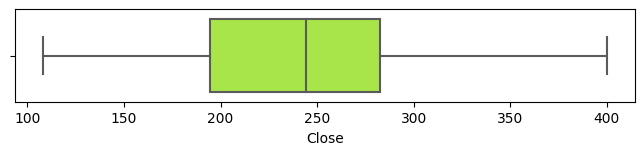

In [14]:
# Plot Boxplot
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['Close'], color="greenyellow")

# Show plot
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-10-10 07:23:10
Python Version: 3.10.13
-----------------------------------


NameError: name 'norm' is not defined

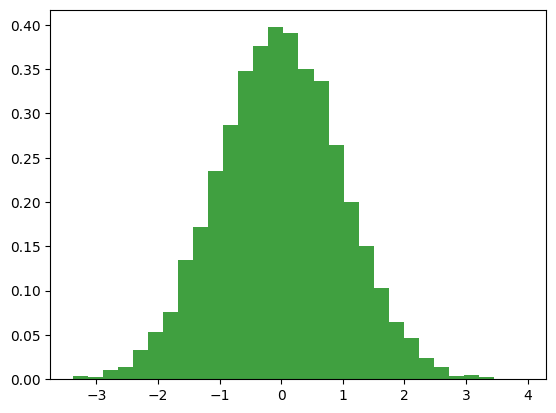

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generiere normalverteilte Daten
mean = 0  # Mittelwert
std_dev = 1  # Standardabweichung
num_records = 10000
data = np.random.normal(mean, std_dev, num_records)

# Erstelle das Histogramm in grüner Farbe
plt.hist(data, bins=30, density=True, alpha=0.75, color='green')

# Füge eine Normalverteilungskurve hinzu
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Beschriftungen und Titel
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.title('Histogramm normalverteilter Daten')

# Anzeigen des Histogramms
plt.show()


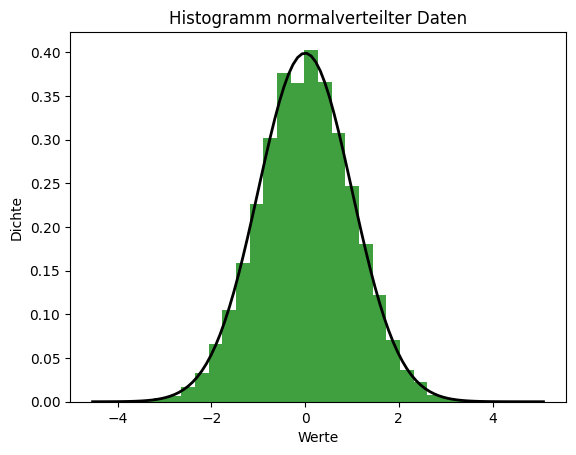

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generiere normalverteilte Daten
mean = 0  # Mittelwert
std_dev = 1  # Standardabweichung
num_records = 10000
data = np.random.normal(mean, std_dev, num_records)

# Erstelle das Histogramm in grüner Farbe
plt.hist(data, bins=30, density=True, alpha=0.75, color='green')

# Füge eine Normalverteilungskurve hinzu
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Beschriftungen und Titel
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.title('Histogramm normalverteilter Daten')

# Anzeigen des Histogramms
plt.show()


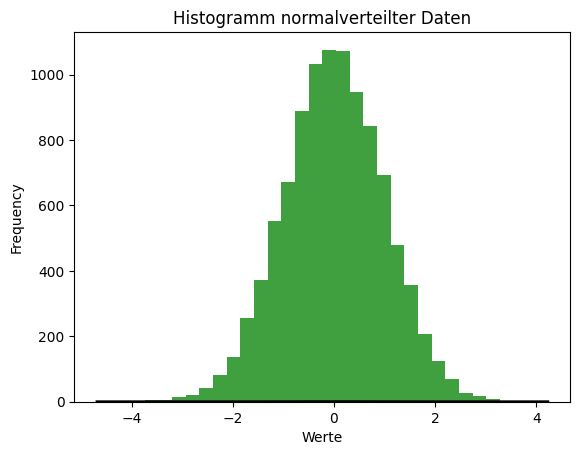

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generiere normalverteilte Daten
mean = 0  # Mittelwert
std_dev = 1  # Standardabweichung
num_records = 10000
data = np.random.normal(mean, std_dev, num_records)

# Erstelle das Histogramm in grüner Farbe mit Frequency
plt.hist(data, bins=30, alpha=0.75, color='green')

# Füge eine Normalverteilungskurve hinzu
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Beschriftungen und Titel
plt.xlabel('Werte')
plt.ylabel('Frequency')
plt.title('Histogramm normalverteilter Daten')

# Anzeigen des Histogramms
plt.show()
